In [319]:
!pip install mplot3d-dragger

In [ ]:
import 

In [1]:
!pip install tensorflow
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\programdata\anaconda3\lib\site-packages (0.5.0)


In [149]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings

In [285]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

In [307]:
dt = pd.read_csv('../train.csv' , encoding='big5')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [308]:
dt = dt.drop("CUS_ID" ,axis=1)

In [309]:
ohi = pd.get_dummies(dt["GENDER"])
ohi
dt = dt.drop("GENDER",axis=1)
dt = pd.concat([ohi,dt],axis=1)

In [310]:
sizemap = {
    "低":1,
    "中":2,
    "中高":3,
    "高":4
}

dt["AGE"] = dt["AGE"].map(sizemap)

In [311]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in dt.keys():    
    for a in dt[i]:
        if  a is not None and isinstance(a,str):
            dt[i] = labelencoder.fit_transform(dt[i].astype(str))
            break

In [312]:
for i in dt.keys():
    dt[i] = dt[i].fillna(dt[i].mean())

In [322]:
from mpl_toolkits.mplot3d import Axes3D

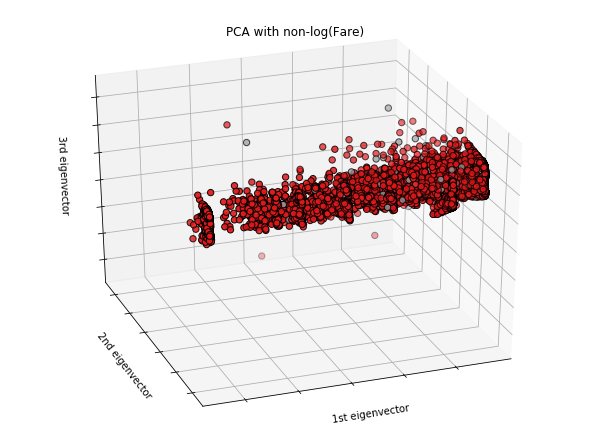

In [323]:
X = np.matrix(dt.drop(['Y1'], axis=1))
Y = np.array(dt['Y1'])

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA with non-log(Fare)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [313]:
dt = dt.sample(frac = 1)

fraud_dt = dt.loc[dt['Y1'] == 1]
non_fraud_dt = dt.loc[dt['Y1'] == 0][:2000]

normal_distributed_dt = pd.concat([fraud_dt, non_fraud_dt])

new_dt = normal_distributed_dt.sample(frac=1, random_state=3)

new_dt.shape

(4000, 132)

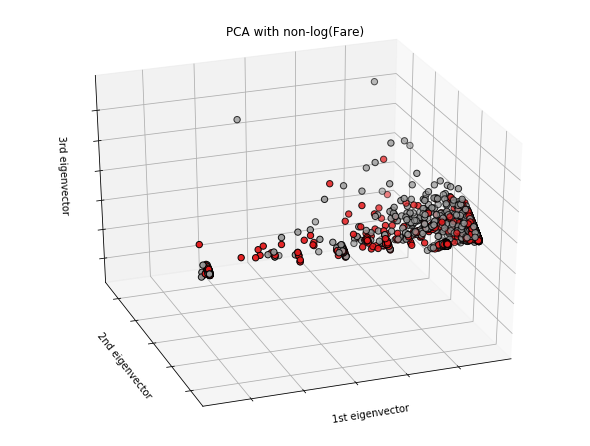

In [324]:
X = np.matrix(new_dt.drop(['Y1'], axis=1))
Y = np.array(new_dt['Y1'])

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA with non-log(Fare)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [314]:
from sklearn import  ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split

x = new_dt.drop("Y1",axis=1)
y = new_dt["Y1"]
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.33)

forest = ensemble.RandomForestClassifier(n_estimators = 300)
forest_fit = forest.fit(train_X, train_y)

In [315]:
test_y_predicted = forest.predict(test_X)

# 績效
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_predicted)
auc = metrics.auc(fpr, tpr)
print(auc)

0.7568749698491424


In [316]:
x1 = dt.drop("Y1",axis=1)
y1 = dt["Y1"]
test_y_predicted = forest.predict(x1)

# 績效
fpr, tpr, thresholds = metrics.roc_curve(y1, test_y_predicted)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8157704081632653


# 預測

In [123]:
df = pd.read_csv('../test.csv' , encoding='big5')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [125]:
df = df.drop("CUS_ID" ,axis=1)

In [126]:
ohi = pd.get_dummies(df["GENDER"])
ohi
df = df.drop("GENDER",axis=1)
df = pd.concat([ohi,df],axis=1)

In [127]:
sizemap = {
    "低":1,
    "中":2,
    "中高":3,
    "高":4
}

df["AGE"] = df["AGE"].map(sizemap)

In [128]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in df.keys():    
    for a in df[i]:
        if  a is not None and isinstance(a,str):
            df[i] = labelencoder.fit_transform(df[i].astype(str))
            break

In [129]:
for i in df.keys():
    df[i] = df[i].fillna(df[i].mean())

In [131]:
xt1 = df
# yt1 = df["Y1"]
test_y_predicted = forest.predict(xt1)

In [132]:
test_y_predicted

array([1, 0, 0, ..., 1, 1, 0])

In [135]:
fin = pd.read_csv('../submit_test.csv' , encoding='big5')

In [137]:
fin["Ypred"] = test_y_predicted

In [142]:
fin.to_csv('submit_test.csv')